In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (289, 512, 3)
Image shape: (512, 512, 3)


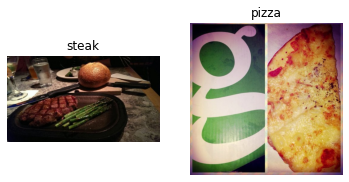

In [3]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_data = train_datagen.flow_from_directory(
    train_dir,                 # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,           # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),  # 처리할 이미지의 크기를 224 X 224로 조정
    class_mode = 'binary',
    seed = 42
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,                 # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,           # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),  # 처리할 이미지의 크기를 224 X 224로 조정
    class_mode = 'binary',
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [5]:
images, labels = train_data.next()

In [6]:
len(images), len(labels)

(30, 30)

In [7]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [8]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [9]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [10]:
model_4 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        strides = 1,
        padding = "valid",
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [11]:
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [12]:
history_4 = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 116s 2s/step - loss: 0.9962 - accuracy: 0.5113 - val_loss: 0.6607 - val_accuracy: 0.5440
Epoch 2/5
50/50 [==============================] - 106s 2s/step - loss: 0.5623 - accuracy: 0.7273 - val_loss: 0.4292 - val_accuracy: 0.8140
Epoch 3/5
50/50 [==============================] - 109s 2s/step - loss: 0.4496 - accuracy: 0.7940 - val_loss: 0.4438 - val_accuracy: 0.8180
Epoch 4/5
50/50 [==============================] - 110s 2s/step - loss: 0.4035 - accuracy: 0.8367 - val_loss: 0.4035 - val_accuracy: 0.8180
Epoch 5/5
50/50 [==============================] - 111s 2s/step - loss: 0.3244 - accuracy: 0.8747 - val_loss: 0.4243 - val_accuracy: 0.8200


In [13]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

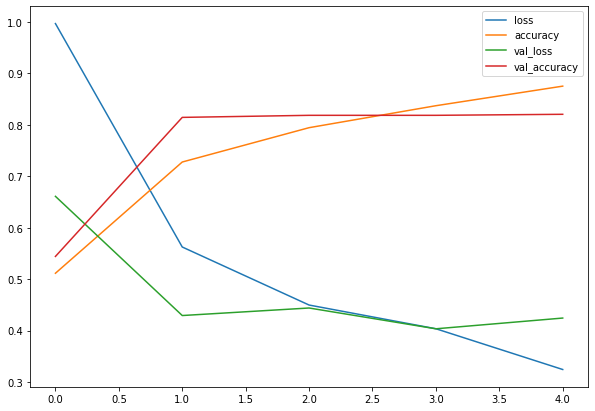

In [14]:
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [15]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

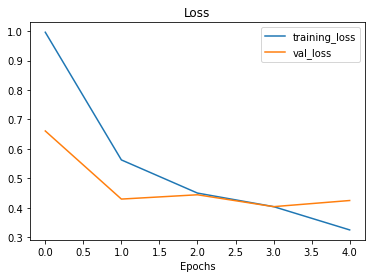

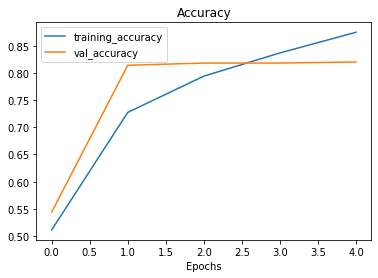

In [16]:
plot_loss_curves(history_4)

In [17]:
model_5 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

history_5 = model_5.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 53s 1s/step - loss: 0.6676 - accuracy: 0.5920 - val_loss: 0.5408 - val_accuracy: 0.7780
Epoch 2/5
50/50 [==============================] - 49s 967ms/step - loss: 0.5086 - accuracy: 0.7727 - val_loss: 0.4455 - val_accuracy: 0.8060
Epoch 3/5
50/50 [==============================] - 53s 1s/step - loss: 0.4592 - accuracy: 0.7973 - val_loss: 0.4014 - val_accuracy: 0.8300
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 0.4405 - accuracy: 0.8093 - val_loss: 0.3903 - val_accuracy: 0.8420
Epoch 5/5
50/50 [==============================] - 57s 1s/step - loss: 0.4166 - accuracy: 0.8187 - val_loss: 0.3598 - val_accuracy: 0.8380


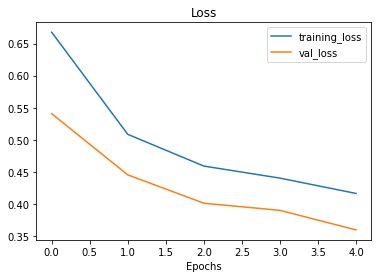

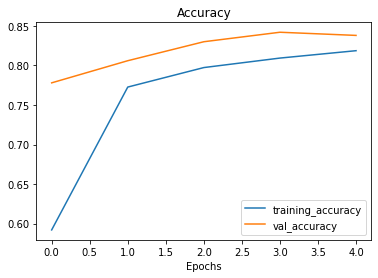

In [18]:
plot_loss_curves(history_5)

In [19]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6760)             